<font size=4 color='blue'>

# <center>Clase 3, febrero 14 del 2023 <center>


<font size=4 color='blue'>
    
## Sistema de estudio:


<font size=5 color='red'>
Movimiento de un carrito en un riel de aire horizontal

<font size=4 color ='black'>
    
Nos interesa conocer la distancia que recorre el objeto conforme pasa el tiempo. Las variables que definen nuestro problema son la distancia que recorre el objeto, <font size=4 color='red' > $\textbf{Y}$(cm)<font size=4 color='black' > y el tiempo, <font size=4 color='red' > $\textbf{X}$(seg)<font size=4 color='black' >.

<img src="./images/car-air-rail.png" width=420 height=420 align = "center" >

<font size=4 color='blue'>
    
## Generación de las mediciones


<font size=4 >
Como el número de mediciones de distancia contra tiempo en un experimento en el laboratorio es reducido, simularemos el movimiento del carrito en el riel de aire. Así obtendremos un número (m) grande de "mediciones".


<font size=4 >

Se genera un conjunto de numeros aleatorios ($(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$)

In [1]:
# Se importan las librerías de Python

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

# Para tener un código en donde todos tengamos los mismos valores, se emplea una semilla aleatoria 
np.random.seed(3)

In [2]:
# Esta función genera un conjunto de datos que simulan 
# la medición de la distancia de un carrito en un riel de aire
# en la ausencia de una fuerza sobre el carrito.
# Se propone un error en la medición de la distancia

def generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error):
    
    # n_points es el número de puntos que serán generados
    
    x = np.random.random(n_points) * measuring_time
     
    # x es arreglo con m numeros aleatorios entre 0.0 y measure_time
    
    error = np.random.randn(n_points) * max_distance_error 
    
    # e es un error generado aleatoriamente con un valor maximo max_distance_error

    y = distance_0 + speed*x + error 
        
    return x, y


In [3]:
# Generacción de las "mediciones" (xi,yi)
n_points = 1000
distance_0 = 100.0
measuring_time = 100.0
speed = 20.0
max_distance_error = 100

x, y = generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


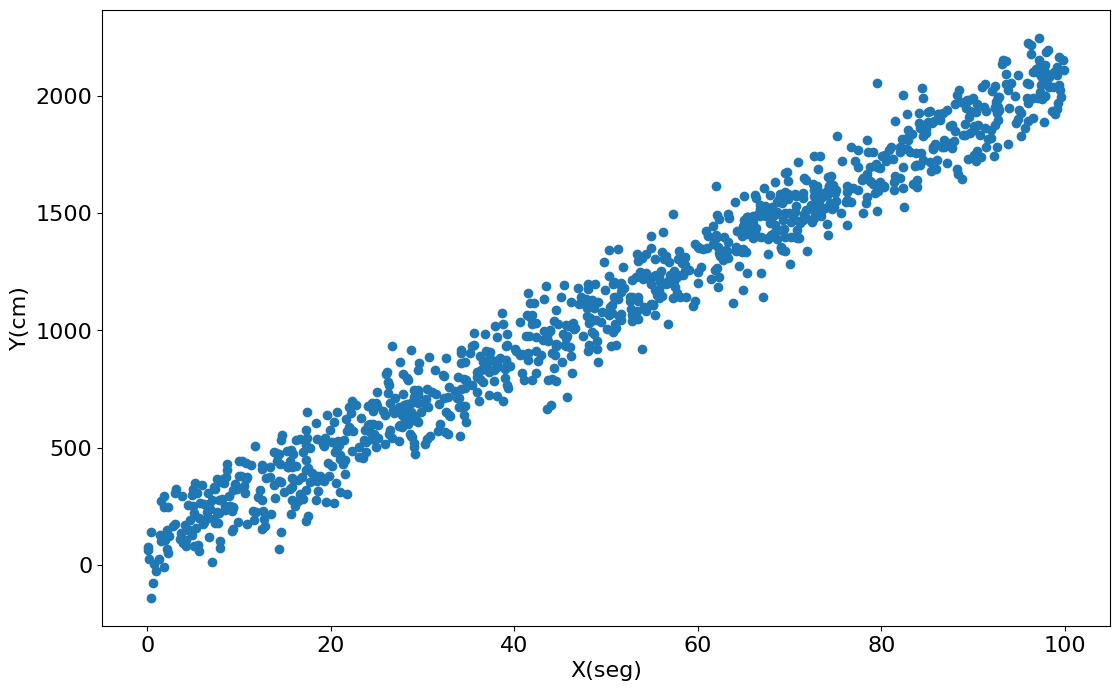

In [4]:
# Graficando y como función de x

plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

plt.scatter(x, y)
plt.show()

<font size=5 color='blue'>
Este conjunto m de puntos ($(x_1,y_1),(x_2,y_2),…,(x_n,y_n)$) son <center>nuestras m muestras Muestras.

<img src="./images/Muestras.jpg" width=420 height=420 align = "center" >


<font size=5 color ='blue'>
    
Se generan histogramas de las variables $\textbf{X}$ y $Y$

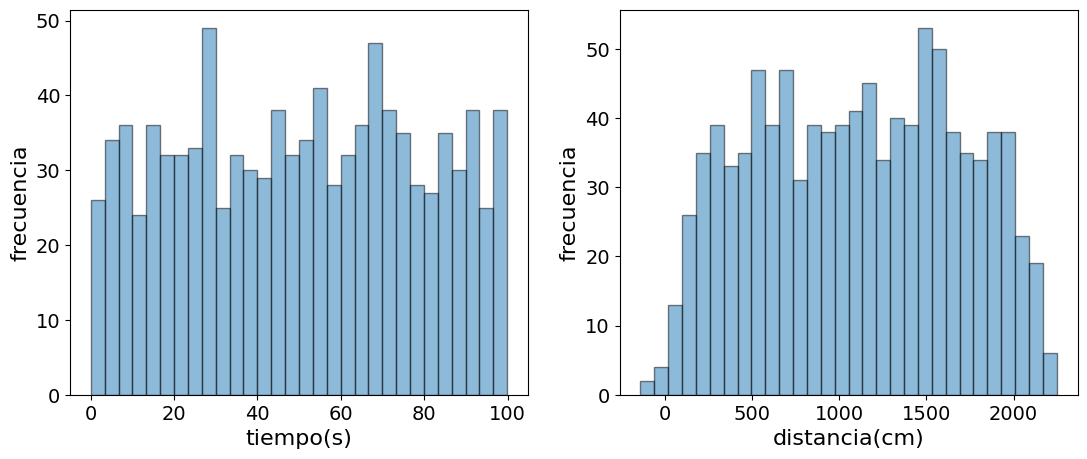

In [5]:
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('tiempo(s)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)


plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('distancia(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

<font size=5, color='blue'>
    
En busca de una función que describa la dependencia de $Y$ con $\textbf{X}$ 



<font size=4>
Para encontrar la dependencia entre estas variables, proponemos para la función $F(X,W,b)$ la siguiente relación lineal:

$$ \hat Y= F(X, W, b) = b + W X $$

en donde $b$ y $W$ son parámetros que determinan la función, $ \hat Y$ son los valores que genera la función.
    
Esta funcion es derivable respecto a todas sus variables, $X, W, b$.
La letra $W$ se emplea como abreviación de la palabra en ingles "weight", porque se relaciona con la importancia que tiene la variable independiente $X$ en el valor de la función $F$. La letra $b$ es la abreviación de la palabra "bias" en ingles (sesgo en español). 


<img src="./images/AI-correlation-function.png" width=200 height=200 align = "center" >

<font size=5, color='blue'>
    
Variamos los valores de $\textbf{W}$ y $b$ para encontrar la función que mejor describa la correlación entre las variables $\textbf{X}$ y $\textbf{Y}$.

<font size = 4>

Para lograr esto necesario generamos una métrica que nos cuantifique la diferencia entre los valores $Y$ medidos y los valores $ \hat Y$ que genera la función, para valores específicos de $\textbf{W}$ y $b$.

En el presente caso, se propone la siguiente métrica: $$ $$ Para cada muestra $(x_i, y_i)$ se evalua $F(x_i,W,b)$ y su valor se compara con el correspondiente valor $y_i$. La diferencia entre estos valores se eleva al cuadrado. $$ $$
   $$ (F(x_i,W,b)-y_i)^{2}$$


Finalmente se calcula el promedio de este valor sobre todas las mediciones, el cual se define como error cuadrático medio (MSE, por sus siglas en ingles, Mean Squared Error). 
Si m es el número de mediciones, el error cuadrático medio queda como:

$$MSE = \dfrac {1}{m}∑_{i=1}^{m}(F(x_i,W,b)-y_i)^{2} $$

<img src="./images/Metrica.png" width=520 height=520 align = "center" >

<font size=4, color='blue'>
    
En el siguiente código se implementa la generación del error cuadrático medio dada la función específica definida por los pesos iniciales w = weight_0, y b = bias_0.

<font size=4 color='red'>
Es importante poner atención en los valores iniciales de w y b.

In [6]:
#Initializing the variables of the function f

weight_0 = 10.0
bias_0 = 100.0

<font size=4 color="blue">

Se grafica la correspondiente función $F(X,W,b)$, junto con los puntos que representan a las m mediciones

residuo: 342017.3540163261


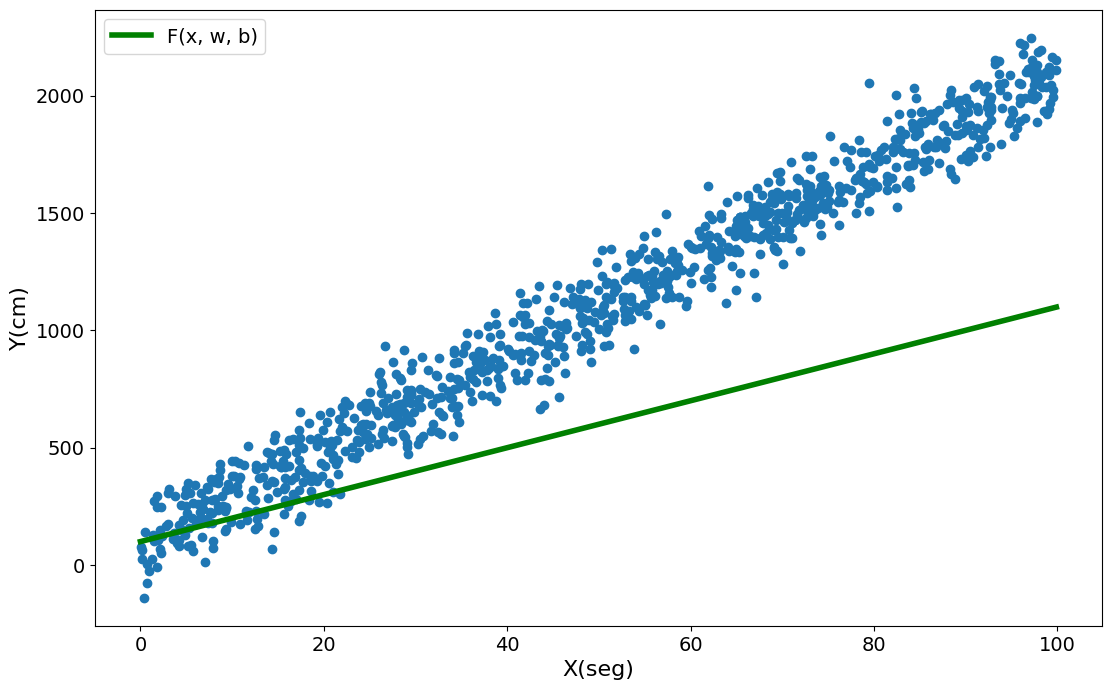

In [7]:

#The following arrays are generated for plotting the Function F(x, weight_0, bias_0)
x_ = np.arange(0.0, measuring_time, 0.1)
y_ = weight_0*x_ + bias_0


# Using this function F, the MSE is calculated by comparing the calculated and measured values

residuo = 0

for i in range(len(x)):

    residuo += (y[i] - weight_0*x[i] - bias_0)**2

residuo = residuo/len(x)

print('residuo:', residuo)

# Samples and function F are plotted
plt.figure(figsize=(13,8))

#Plotting function
plt.plot(x_, y_, color='green', lw=4, label='F(x, w, b)')
plt.legend()
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)
plt.ylabel('Y(cm)', fontsize=16)
plt.xlabel('X(seg)', fontsize=16)

#Plotting samples
plt.scatter(x, y)

plt.show()

<font size=4, color='blue'>
Se actualizan los valores de los parámetros W y b buscando reducir el error cuadrático medio.

<font size=4, color='blue'>

Se emplea el método de gradiente descendente para realizar esta actualización.
    
[Cauchy, Gradiente Descendente](./Literatura/Cauchy_gradient-descent.pdf)

<font size=4 color='black'>
    
Los parámetros $W$ y $b$ se deben actualizar, de manera que el MSE, disminuya. 

Esto se realiza usando el método de gradiente descendente:

$$ W_{new} = W_{initial} - \alpha \dfrac{\partial MSE(W, b)}{\partial W}$$

$$ b_{new} = b_{initial} - \alpha \dfrac{\partial MSE(W, b)}{\partial b}$$

$\alpha$, como vimos en la clase anterior, depende de los valores del gradiente; y nos permite usar este (el gradiente) para actualizar los valores de los parámetros $W$ y de $b$. Para distinguier la $\alpha$ de los parámetros que pueden variar durante el ajuste, $W$ y $b$, se le da el nombre de hiperparámetro del modelo.


Dado que el error cuadrático medio está definido mediante la relación siguiente:

$$ MSE = \dfrac{1}{m}∑_{i=1}^{m}(F(x_i,W,b) - y_i)^{2} = \dfrac{1}{m}∑_{i=1}^{m}(W x_i + b -y_i)^2 $$

las derivadas quedan como:

$$ \dfrac{\partial MSE(W, b)}{\partial W} = \dfrac{2}{m}∑_{i=1}^{m}[(W x_i + b -y_i)(x_i)]$$

$$ \dfrac{\partial MSE(W, b)}{\partial b} = \dfrac{2}{m}∑_{i=1}^{m}[(W x_i + b -y_i)]$$



<img src="./images/W-b-update.png" width=620 height=620 align = "center" >


In [8]:
#Function to update the parameters weight and bias

def update_parameters(x, y, weight, bias, alfa, num_iteraciones):
    
    # inicializacion de parametros

    alfa = alfa
    residuo = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(22,8))    
    
    ax1 = plt.subplot(1,3,1)
    ax2 = plt.subplot(1,3,2)
    ax3 = plt.subplot(1,3,3)
    
    ax1.scatter(x, y)

    ax1.set_title('Y vs X', size=24)
    ax1.set_xlabel('X', size=20)
    ax1.set_ylabel('Y', size=20)

    # Recta generada con los parametros iniciales

    y_ = weight*x + bias
    
    ax1.plot(x, y_, color='green', lw=4 )
    
    weights = []
    biases = []
    residuos = []
    
    for i in range(num_iteraciones):

        # calculo de derivadas y el residuo

        for i in range(m):

            r = (y[i]-weight*x[i] - bias)**2

            d_w += 2*(weight*x[i] + bias- y[i])*x[i]
            
            d_b += 2*(weight*x[i]+bias-y[i])

            residuo += r

        residuo /= m

        d_w /= m

        d_b /= m
        
        weights.append(weight)
        biases.append(bias)
        residuos.append(residuo)
        
        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b


        # Recta generada con la actualizacion de los parametros
        
        y_ = weight*x + bias
        
        ax1.plot(x, y_, lw=4 )

        # Grafica de los residuos como funcion de uno de los parametros (el peso)
        
        ax2.scatter(weight, residuo)
        ax2.set_title('MSE vs weight', size=24)
        ax2.set_xlabel('weight', size=22)
        ax2.set_ylabel('MSE', size=22)

        # Grafica de los residuos como funcion de uno de los parametros (el bias)
        
        ax3.scatter(bias, residuo)
        ax3.set_title('MSE vs bias', size=24)
        ax3.set_xlabel('bias', size=22)
        ax3.set_ylabel('MSE', size=22)


    return weights, biases, residuos

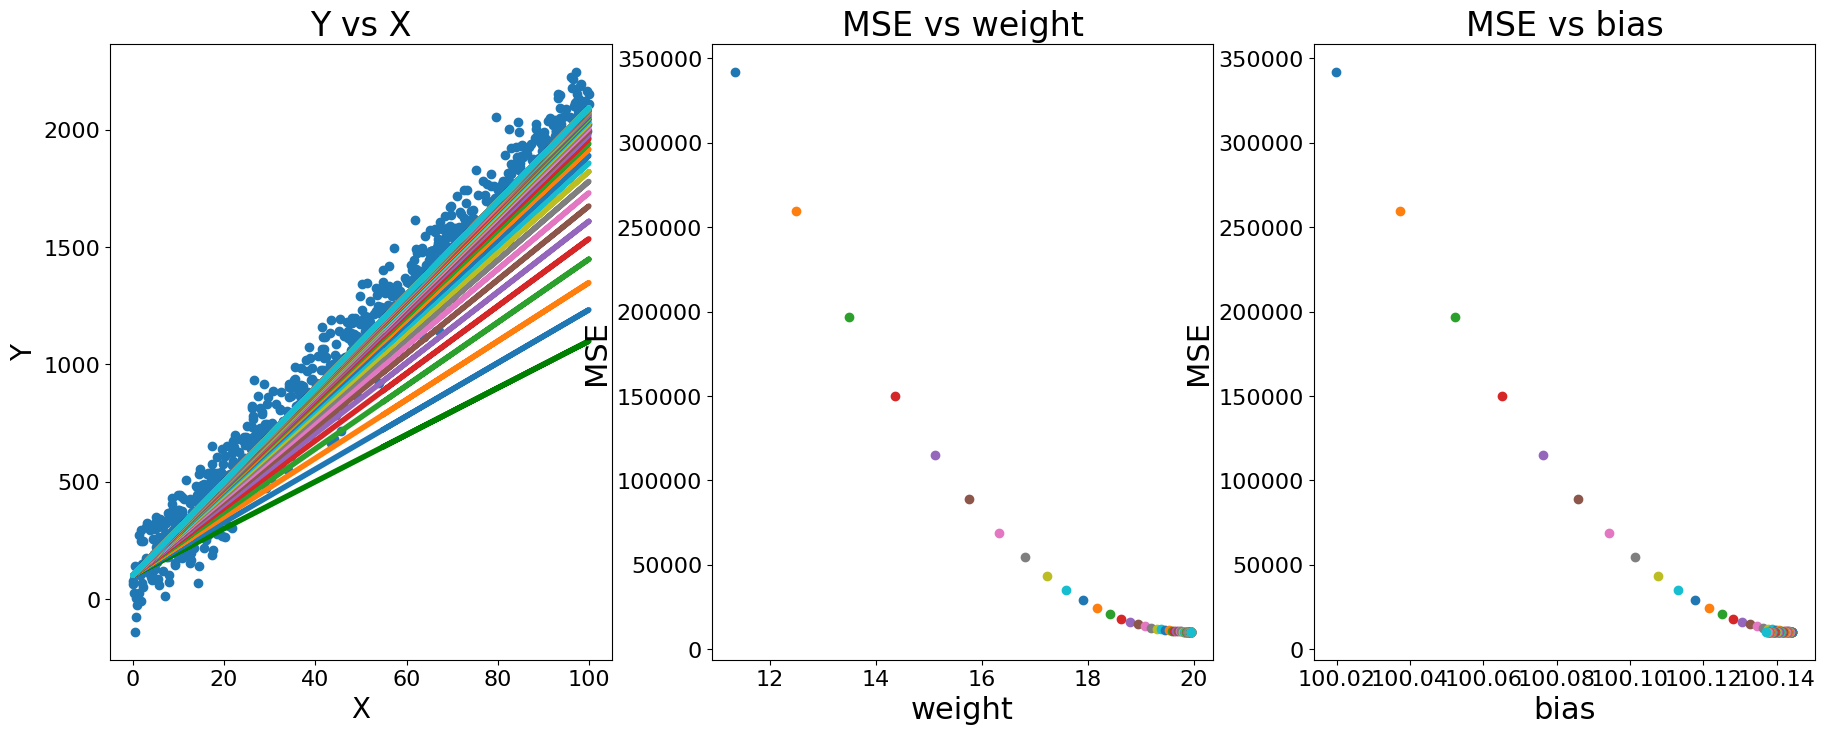

In [9]:
# inicializacion de parametros

weight = weight_0 
bias = bias_0 
alfa = 0.00002
num_iter = 100
weights, biases, residuos = update_parameters(x, y, weight, bias, alfa, num_iter)

<font size=4, color='blue'>

<center>Se grafica del error cuadrático medio, MSE, 
 
<center>como función de cada iteración en que se modificaron  $b$, y $W$.</center>

<font size=4, color='black'>
Esto nos permite ver de manera rápida como varía el error cuadrático medio conforme se van variando los parámetros W y b. Esta gráfica es muy útil sobre todo cuando el número de parámetros W y b es grande. Es una forma sencilla de ver la variación del error cuadrático conforme se varían los parámetros.

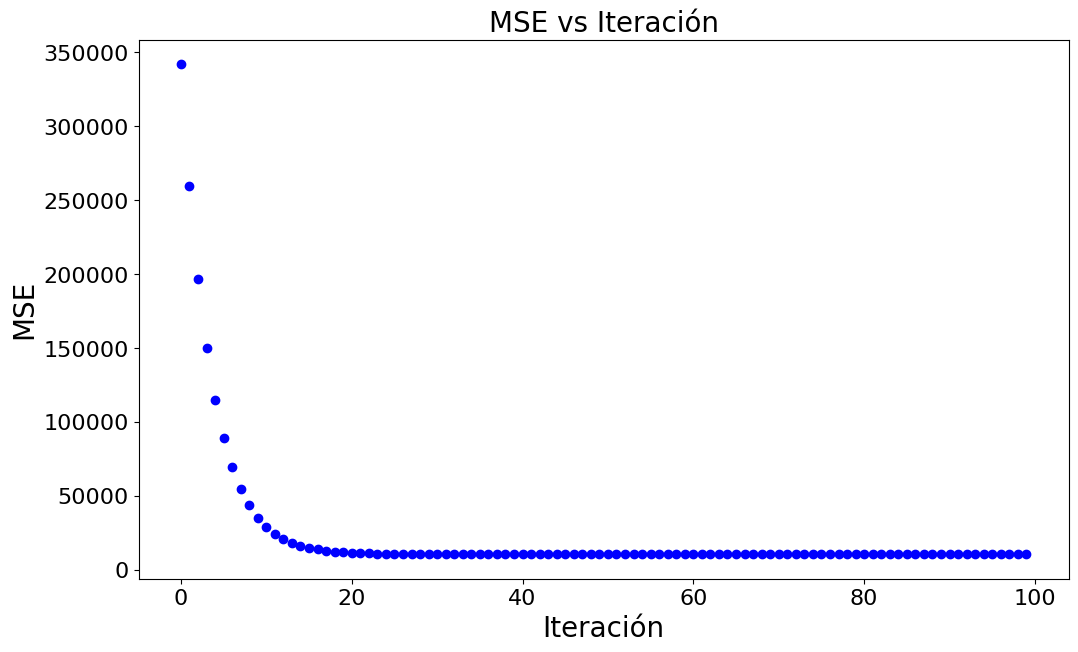

In [10]:
plt.figure(figsize=(12, 7))
plt.scatter(range(num_iter), residuos, color='blue')
plt.title('MSE vs Iteración', size=20)
plt.xlabel('Iteración', size=20)
plt.ylabel('MSE', size=20);

<font size=5, color='blue'>

Resumen del ajuste de datos para buscar la correlación entre las variables X y Y.

<img src="./images/Metrica-and-update.png" width=620 height=620 align = "center" >

<font size=6, color='blue'>

<center> Alternativa para analizar la evolución del ajuste para encontrar la $$$$ correlación entre las variables X y Y.

<font size=4, color='blue'>

Ahora enriquecemos la técnica que hemos descrito. Se separa una parte del total de las mediciones para evaluar al final el ajuste que se obtiene.

<font size=4>
El total de las mediciones son divididas en dos grupos: uno con el 90 % de las mediciones (mediciones_ajusta) y el segundo con el restante 10 % (mediciones_prueba)

<img src="./images/Mediciones-ajustar-prueba.png" width=550 height=550 align = "center" >

<font size=4>
A continuación desarrollamos el código para reordenar los datos al azar, y separlos en dos partes

<font size=4>
    
La funcion shuffle reordena de forma aleatoria la posicion de un conjunto de datos en una lista.

     x = [ 1, 5, 7, 3, 8]
     shuffle(x) = [5, 8, 3, 1, 7]

 La funcion zip permite hacer conjuntos ordenados de datos combinando dos vectores de igual dimensión, por ejemplo

     x = [1, 2, 3]
     y = [5, 6, 7]
    
     zip(x, y) = ((1, 5), (2, 6), (3, 7))
    
 De esta manera, junto con la funcion shuffle, se asegura que los datos correspondientes a $x$ y $y$ intercambian su posición de la misma manera.
 

Por otra parte, la operación zip(*a) separa los datos "a" que inicialmente están mezclados
    
a = [[1,2,3],['a','b','c'],[7,8,9]]$$$$
b = zip(*a)
    
for c in b:
    print(c)
    
(1, 'a', 7)
(2, 'b', 8)
(3, 'c', 9)
    

Número total de mediciones: 1000
Número de mediciones para ajustar: 900
Número de mediciones para evaluar el ajuste 100


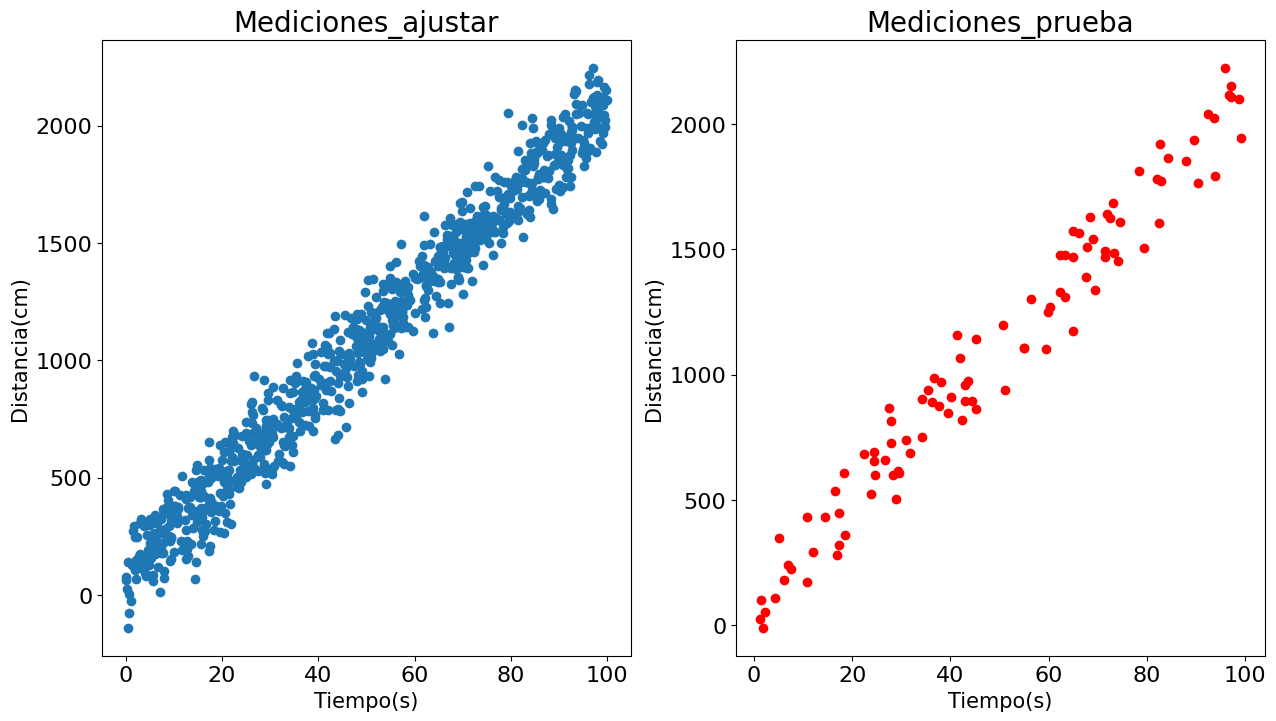

In [11]:
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

print("Número total de mediciones:", len(x))

# Los datos se dividen

muestras_ajustar = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
print("Número de mediciones para ajustar:", len(muestras_ajustar[0]))

muestras_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])
print("Número de mediciones para evaluar el ajuste", len(muestras_test[0]))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(muestras_ajustar[0], muestras_ajustar[1])
plt.title('Mediciones_ajustar', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(muestras_test[0], muestras_test[1], color='red')
plt.title('Mediciones_prueba', size=20)
plt.xlabel('Tiempo(s)', size =15)
plt.ylabel('Distancia(cm)', size =15);

<font size =5, color = 'blue'>
    
Normalizacion de las muestras que se emplearan para encontrar la correlación entre las variables X y Y (ajuste).
 

<font size=4 color='b'>
    
 Si se normalizan los datos con 3 veces la desviacion estandar, el 99.7 de los datos tendrán valores entre -1 y 1. El rango con que se normaliza tambien se puede variar entre una desviación o dos desviaciones estandar. En el primer caso el 68 % de los datos tendrán valores entre -1 y 1, mientras que en el segundo caso este rango correspondera al 95 % de los datos.

<img src="./images/Standard-deviation.png" width=420 height=420 align = "center" >

<font size=4 color='red'>

Normalmente los datos se normalizan con sólo una desviación estandar. Esto es lo que aplicaremos para el resto del curso

<font size=4, color='blue'>
Los valores se normalizan usando solo una desviación estandar, de manera que el 68 % de los datos quedan con valores entre -1 y +1.

In [12]:
x_ajustar = muestras_ajustar[0]
y_ajustar = muestras_ajustar[1]

In [13]:
mean_distance = np.mean(y_ajustar)
std_distance = np.std(y_ajustar)

ajustar_y = (y_ajustar-mean_distance)/std_distance

mean_time = np.mean(x_ajustar)
std_time = np.std(x_ajustar)

ajustar_x = (x_ajustar-mean_time)/std_time

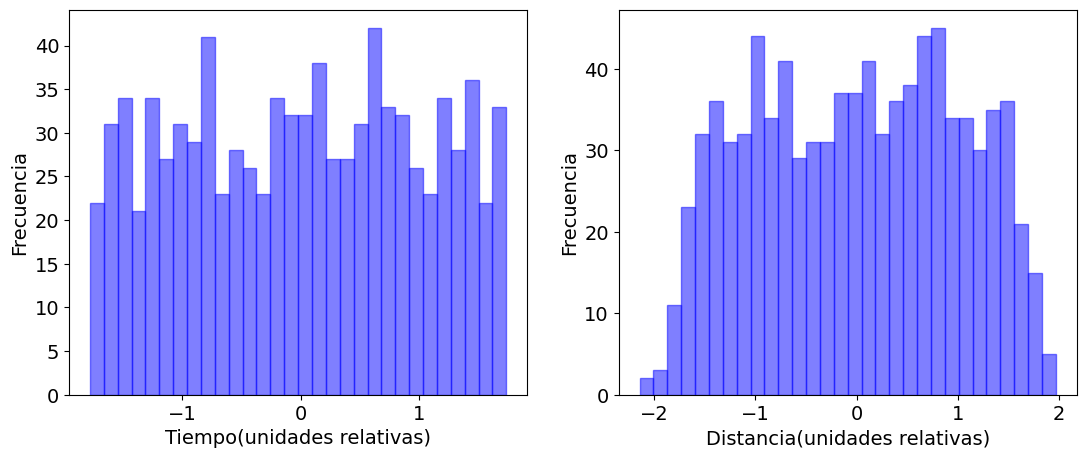

In [14]:
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)


plt.subplot(1, 2, 1)
plt.hist(ajustar_x, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Tiempo(unidades relativas)', fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)


plt.subplot(1, 2, 2)
plt.hist(ajustar_y, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Distancia(unidades relativas)',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14);

<font size=4, color='blue'>
Se vuelve a correr el ajuste de datos empleando el metodo de gradiente descendente, pero usando sólo el conjunto de datos correspondiente al 90 %

0.5538378940544446 0.0009300367318387792


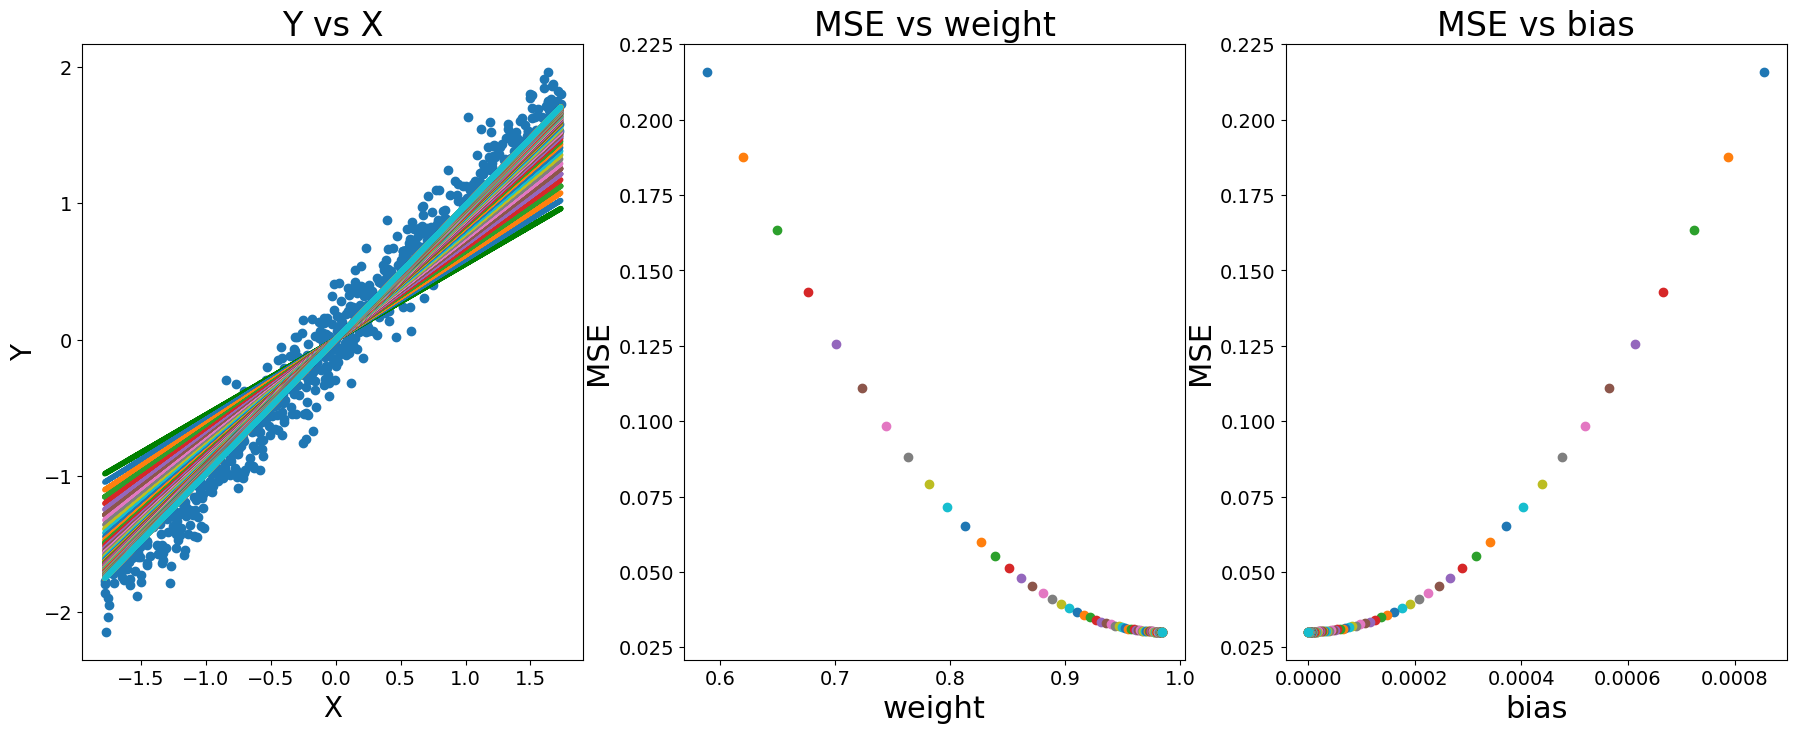

In [15]:

weight_0 = np.random.random()
bias_0 = np.random.random()
print(weight_0, bias_0)

alfa = 0.04       #relación de ajuste
num_iter = 100    #número de iteraciones

weights, biases, MSE = update_parameters(ajustar_x, ajustar_y, weight_0, bias_0, alfa, num_iter)


<font size=4, color='blue'>
Graficar el error cuadrático medio obtenido como función del número de iteración

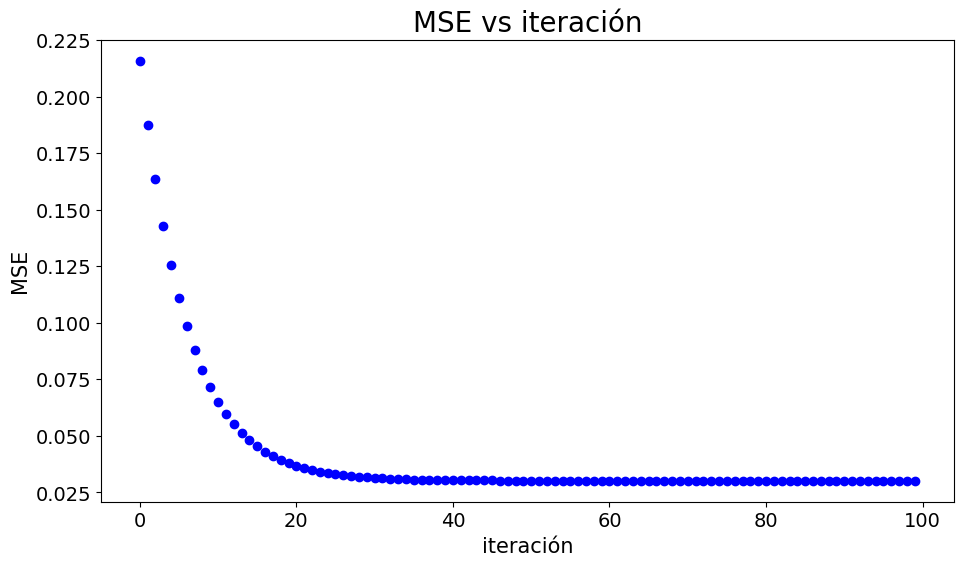

In [16]:
plt.figure(figsize=(11, 6))
plt.scatter(range(num_iter), MSE, color='blue')
plt.title('MSE vs iteración', size=20)
plt.xlabel('iteración', size=15)
plt.ylabel('MSE', size=15);


In [17]:
def MSE(x, y, weight, bias):
    
    r = 0

    m = len(x)
    
    for i in range(m):

        r += (y[i]-weight*x[i] - bias)**2

    r /= m
    
    return r

In [18]:
print("El MSE mínimo durante el ajuste es =  %.5f" \
      %MSE(ajustar_x, ajustar_y, weights[-1], biases[-1]))


El MSE mínimo durante el ajuste es =  0.03014


<font size=4, color='blue'>
Con los valores optimos de $b$ y $W$, se calcula el error cuadrático medio que se obtiene con el 10 % de los datos restantes.

<font size=4, color='black'>

Para calcular el residuo asociado a las muestras_test, estas se normalizan con los parámetros (valor medio y desviación estandar) utilizados para normalizar los datos de las muestras_ajustar.

In [19]:
test_y = (muestras_test[1]-mean_distance)/std_distance

test_x = (muestras_test[0]-mean_time)/std_time

print("MSE_prueba =  %.5f" %MSE(test_x, test_y, weights[-1], biases[-1]))

MSE_prueba =  0.03546


<font size=5, color='blue'>

<center>Otra forma de evaluar el ajuste obtenido.

<font size=4>
   
En este caso, las muestras seleccionadas para hacer el ajuste se dividen en dos grupos:

El 90 % (este valor es solo un ejemplo) de ellas se emplea para hacer el ajuste, mientras que
    
el 10 % restante se emplean para evaluar el error cuadrático medio obtenido en cada iteración del ajuste.


<img src="./images/Mediciones-ajustar-valida.png" width=550 height=550 align = "center" >

<font size=4, color='black'>

Modificamos la función que se tiene para actualizar $W$ y $b$ en cada ciclo. Esta nueva función recibe la proporción (val_ratio) de los datos de ajuste que se emplean para validar.

In [20]:
#Function to update weight and bias

def update_parameters_1(x, y, weight, bias, alfa, iteraciones, val_ratio=0.1):
    
    # inicializacion de parametros
    
    #x = np.squeeze(x)
    #y = np.squeeze(y)
    alfa = alfa
    residuo = 0
    d_w = 0.0
    d_b = 0.0
    m = len(x)

    # Especificaciones de las graficas
    plt.figure(figsize=(13,8)) 
    plt.title('MSE vs iteración', size=24)
    plt.xlabel('iteración', size=18)
    plt.ylabel('MSE', size=18)
    
    ajustar_ratio = int((1.0-val_ratio)*len(x))  
   
    samples_ajustar = (x[0:ajustar_ratio], y[0:ajustar_ratio])
    samples_val = (x[ajustar_ratio:], y[ajustar_ratio:])
    x = samples_ajustar[0]
    y = samples_ajustar[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
       
    weights = []
    biases = []
    residuos = []
    residuos_val = []
    
    m_ajustar = len(x)
    m_val = len(x_val)
    
    for i in range(iteraciones):

        # calculo de derivadas y el residuo
        residuo = 0.0
        residuo_val = 0.0
        
        for j in range(m_ajustar):

            r = (y[j]-weight*x[j] - bias)**2

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            
            d_b += 2*(weight*x[j]+bias-y[j])

            residuo += r

        residuo /= m_ajustar

        d_w /= m_ajustar

        d_b /= m_ajustar
        
        #calculo del residuo de las muestras de valoración
        
        for j in range(m_val):

            r = (y_val[j]-weight*x_val[j] - bias)**2

            #r += np.squeeze(r)
            residuo_val += r

        residuo_val /= m_val
                      
        weights.append(weight)
        biases.append(bias)
        residuos.append(residuo)
        residuos_val.append(residuo_val)
        
        # Actualizacion de los parametros

        weight = weight - alfa*d_w
        bias = bias - alfa*d_b
        
        plt.scatter(i, residuo, color='blue')
        
        plt.scatter(i, residuo_val, color='orange')
        
        plt.legend(['Ajuste', 'Validation'], loc='upper right')


    return weights, biases, residuos, residuos_val

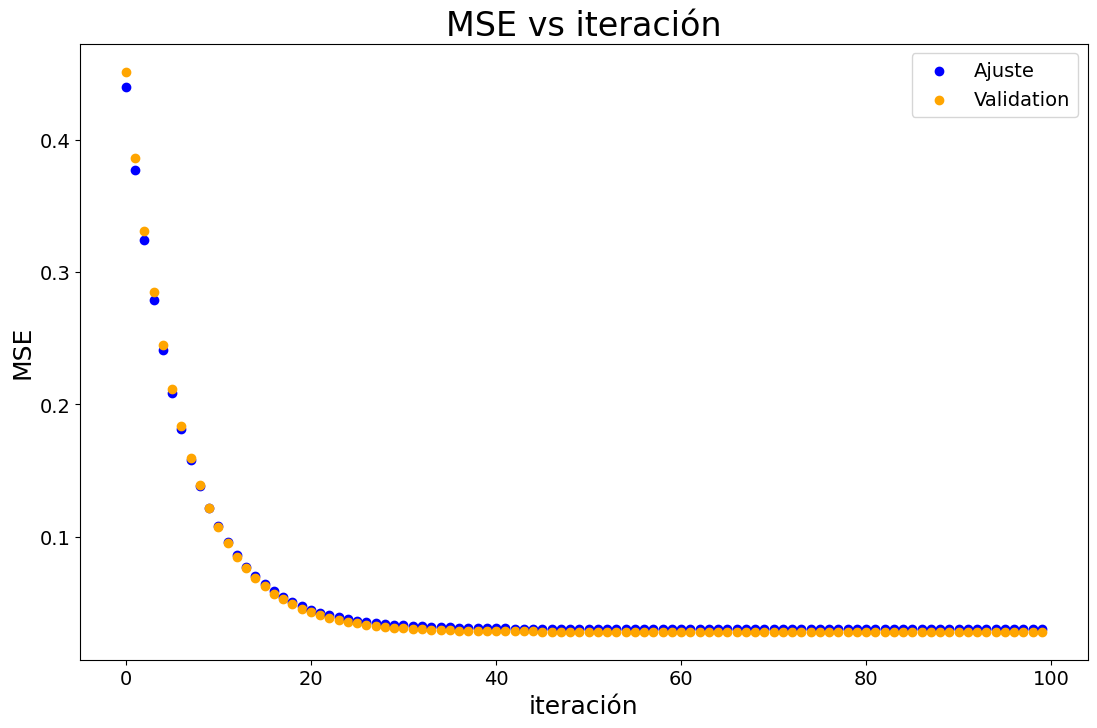

In [21]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alfa = 0.04
num_iter = 100
validacion_ratio = 0.1

weights, biases, mse, mse_val = update_parameters_1 \
        (ajustar_x, ajustar_y, weight_0, bias_0, alfa, num_iter, validacion_ratio)


<font size=4, color='blue'>

Con los valores óptimos obtenidos para $W$ y $b$, evaluamos ahora el residuo que se obtiene las muestras_prueba.

In [22]:
print("MSE_prueba =  %.5f" %MSE(test_x, test_y, weights[-1], biases[-1]))


MSE_prueba =  0.03543


<font size=5, color='blue'>

Inferencia

<font size=4, color='black'>

Dado el tiempo x (no empleado en las mediciones) podemos obtener una predicción (inferencia) del valor de la distancia d que recorre el carrito.

In [23]:
def inference(t, w, b, mean_t, std_t, mean_y, std_y) :
    
    t = (t-mean_t) / std_t 
    d = w * t + b
    
    d = d * std_y + mean_y
    
    return d

In [24]:
#El tiempo esta dado en las unidades con los que se recolectaron los datos, segundos
tiempos = [1.65, 32.20, 43.5, 84.7]

for t in tiempos :
    distance = inference(t,weights[-1], biases[-1], mean_time, std_time, mean_distance, std_distance)

    print ("Para el tiempo de {0:5.2f} s la distancia inferida es {1:6.2f} cm ".format(t,distance))

Para el tiempo de  1.65 s la distancia inferida es 119.75 cm 
Para el tiempo de 32.20 s la distancia inferida es 734.61 cm 
Para el tiempo de 43.50 s la distancia inferida es 962.04 cm 
Para el tiempo de 84.70 s la distancia inferida es 1791.25 cm 


<font size=4 color='black'>

Vemos entonces que con el ajuste de una función que correlaciona las variables X y Y podemos hacer predicciones del valor de y dado el valor de x. 
    
Es decir, el sistema desarrollado "aprendió" la correlación que hay entre las variables $X$ y $Y$, y por ello, puede hacer inferencias.

<font size=6 color='blue'>

<center>Inteligencia Artificial <center>

<font size=5 color='blue'>

Pasaremos conceptualmente de la nomenclatura de ajuste de datos para encontrar la $$$$correlación entre las variables X y Y a la nomenclatura que se emplea en Inteligencia$$ $$ Artificial.

<font size=4 color='black'>

Esta transición la haremos empleando toda la matematica desarrollada en las celdas anteriores.

<font size=4 color='black'>
    
En inteligencia artificial, un sistema es "inteligente" cuando despues de ser entrenado con información que le es suministrada, es capaz de hacer inferencias (predicciones).



<font size=4 color='blue'>
 
Dada la dinámica del desarrollo de la inteligencia artificial a nivel mundial, en el presente curso, emplearemos la nomenclatura estandar que se emplea en el idioma Ingles.

<font size=4 color='black'>

Al buscar resolver un problema en la vida real, después de analizarlo debemos proponer las variables que consideramos lo describen.
    
El paso siguiente es cuantificar estas variables y asignarles valores.

El problema puede definir de manera destacada una de las variables, una en la cual se tenga particular interés, esta variable la definimos como la variable $Y$, la cual considermos depende del resto de las variables que identifican al problema, estas variables serán las variables independientes $\textbf X$.

<font size=4 color='blue'>
    
El ejemplo que vimos de ajuste de una función a un conjunto de puntos $(x_i, y_i)$ para encontrar la correlación entre las variables X y Y, lo traduciremos a un sistema de aprendizaje artificial.

<img src="./images/Sistema-de-estudio.png" width=620 height=620 align = "center" >

<font size=5 color='blue' >
<center> Sistema de estudio: Movimiento de un carrito en un riel de aire horizontal

<font size=5 color='red' >
  
Nos interesa predecir la distancia que recorre un objeto con el tiempo, cuando tiene un$$$$ movimiento rectilineo y uniforme

<font size=4 >

Proponemos que esta distancia depende solo del tiempo, el cual lo identificaremos con la variable $X$.    

<font size=5 color='blue'>

Analizaremos un ejemplo:

<font size=4 color='black'>

Tenemos un cuerpo, del cual se han obtenido $m$ muestras (mediciones) de estas variables. Cada muestra de este cuerpo la identificamos por la dupla $(x_i, y_i)$.
    
Generaremos un sistema de aprendizaje, en donde proponemos que la función $F(\textbf {X},\textbf W,b)$ describe la relación entre estas variables. 
    
Esta función puede tener diferentes formas. Por ejemplo:
    
$$F(\textbf {X}, \textbf {W}, b) = b + \textbf {WX}$$
    
o bien:
    
$$ F(\textbf {X},\textbf {W},b) = 1.7159*tanh(\textbf {WX}+b) $$
    
o bien:
    
$$ F(\textbf {X},\textbf{W},b) = Artificial-Neural-Network (\textbf {ANN})$$
    
o bien:
    
$$ F(\textbf {X},\textbf{W},b) = Supported-Vector-Machine(SVM)$$
    
o bien: 
    
$$ F(\textbf {X},\textbf{W},b) = Decision-Tree $$
    
o bien:
    
$$ F(\textbf {X},\textbf{W},b) = Decision-Random-Forest $$
    
entre otras.   

<img src="./images/AI-correlation-function.png" width=200 height=200 align = "center" >

<font size=4 color='black'>

Dada la simplicidad de nuestros datos, para nuestro sistema de aprendizaje proponemos que la relación entre las variables que describen nuestro sistema es una relación lineal, descrita por la función:
    
 $$F(\textbf{X},\textbf{W}, b) = b + \textbf{WX}$$
    
En la nomenclatura de inteligencia artificial, esto significa que nuestro problema corresponde a una "regresión lineal" (Linear regression). Nomenclatura muy desafortunada. Esta definicion corresponde a problemas en donde los valores de la variable Y son no discretos.

<font size=4, color='blue'>

Este es el origen de el término regresion: "Se regresa al tamaño anterior" en estatura, en tamaño de la semilla. El término no indica nada sobre el hecho de que la variable Y toma valores continuos (no discretos).
    
[Origen del término regresion: Francis Galton, 1877](./Literatura/regression_meaning-1_galton-1877-typical-laws-heredity.pdf)$$ $$
[Origen del término regresión: W.F. Stanly, 1885](./Literatura/regression_meaning-2-galton-1885-rba-address.pdf)

<font size=5 color='blue'>

Estos son los datos que describen el movimiento de nuestro cuerpo

In [25]:
# Generacción de las muestras (xi,yi)
n_points = 1000
distance_0 = 100.0
measuring_time = 100.0
speed = 20.0
max_distance_error = 100

x, y = generador_datos_simple(n_points, distance_0, measuring_time, speed, max_distance_error)

print("x type", type(x), "x shape", x.shape)
print("y type", type(y), "y shape", y.shape)

x type <class 'numpy.ndarray'> x shape (1000,)
y type <class 'numpy.ndarray'> y shape (1000,)


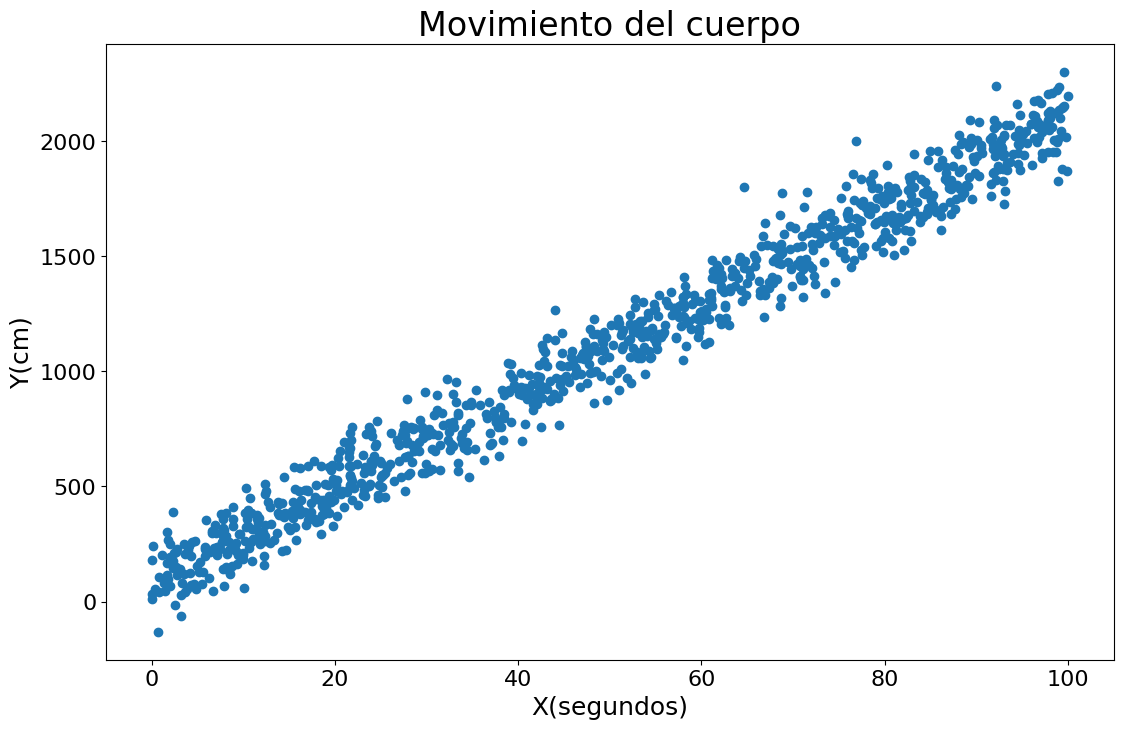

In [26]:
plt.figure(figsize=(13,8))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=16)


plt.scatter(x, y)
plt.title('Movimiento del cuerpo', size=24)
plt.xlabel('X(segundos)', size=18)
plt.ylabel('Y(cm)', size=18);

plt.show()

<font size=4 color ='blue'>
Se generan histogramas de las variables $X$ y $Y$

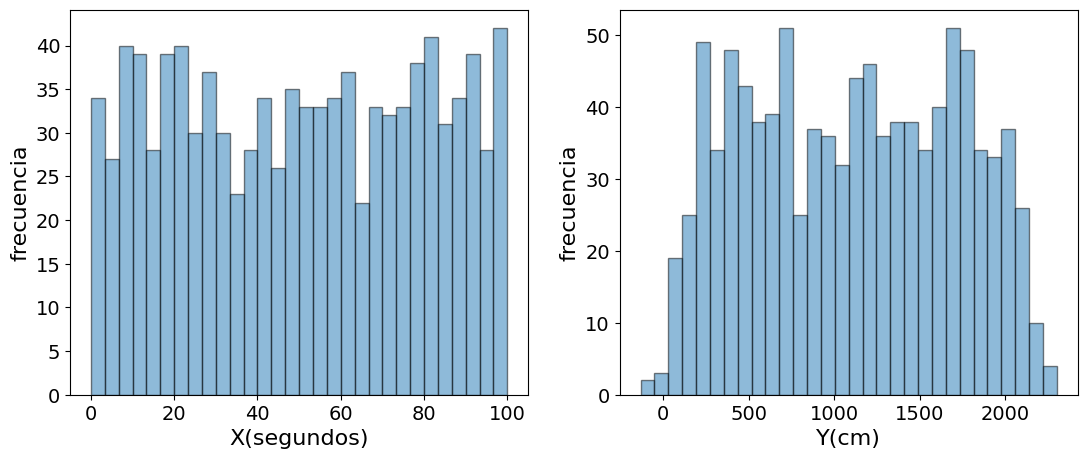

In [27]:
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

plt.subplot(1, 2, 1)
plt.hist(x, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('X(segundos)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16)


plt.subplot(1, 2, 2)
plt.hist(y, bins=30, edgecolor='black', alpha=0.5)
plt.xlabel('Y(cm)', fontsize=16)
plt.ylabel('frecuencia', fontsize=16);

<font size=4, color='blue'>
El total de los datos son divididos en dos grupos: uno con el 90 % de los datos para realizar el aprendizaje, y el segundo con el restante 10 % para probar la calidad del aprendizaje.

<img src="./images/AI-train-val-test-data.png" width=550 height=550 align = "center" >

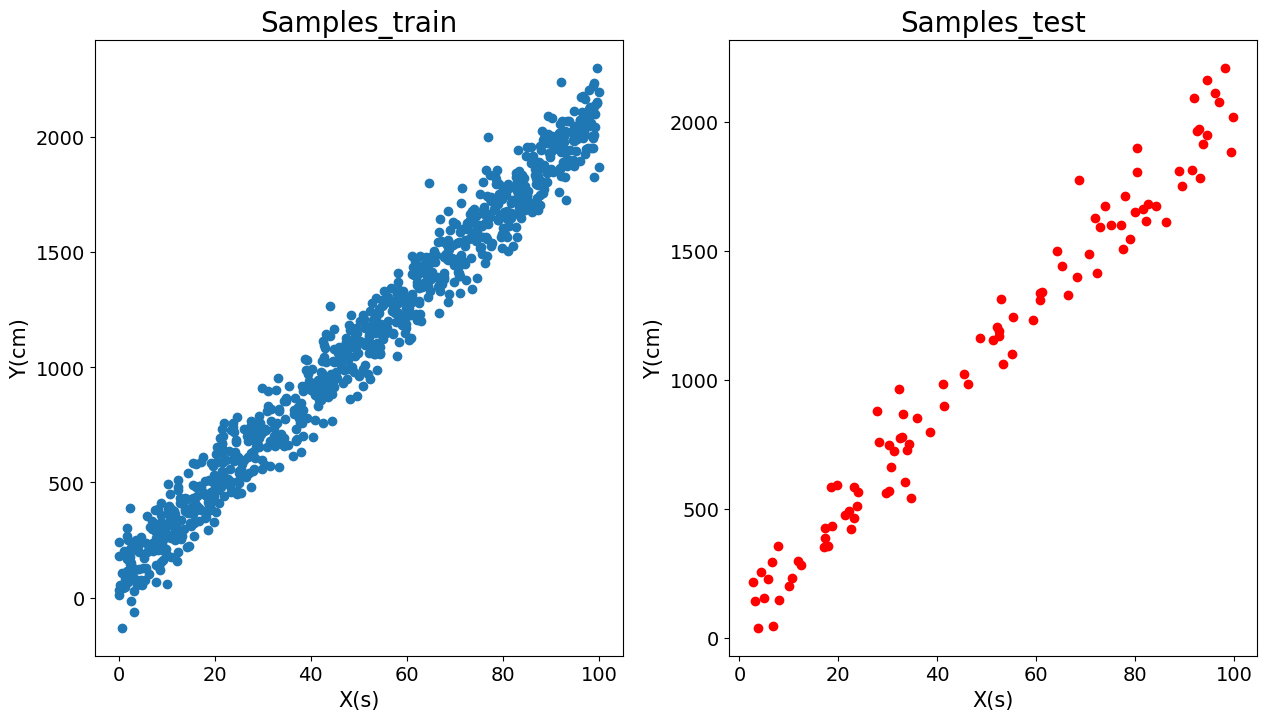

In [28]:
# Los datos se cambian de posicion aleatoriamente

from random import shuffle

c = list(zip(x, y)) 

shuffle(c)
    
(x, y) = zip(*c)

#print(len(x), len(y))

# Los datos se dividen

samples_train = (x[0:int(0.90*len(x))], y[0:int(0.90*len(y))])
#print(len(samples_train[0]), len(samples_train[1]))

samples_test = (x[int(0.90*len(x)):], y[int(0.90*len(y)):])

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.scatter(samples_train[0], samples_train[1])
plt.title('Samples_train', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15)
plt.subplot(1, 2, 2)
plt.scatter(samples_test[0], samples_test[1], color='red')
plt.title('Samples_test', size=20)
plt.xlabel('X(s)', size =15)
plt.ylabel('Y(cm)', size =15);

<font size=4, color='blue'>
Para las muestras de entrenamiento, las variables se normalizan empleando su promedio y su desviación estandar.

In [29]:
x_train = samples_train[0]
y_train = samples_train[1]
x_test = samples_test[0]
y_test = samples_test[1]

In [30]:
y_mean = np.mean(y_train)
y_std = np.std(y_train)

train_y = (y_train-y_mean)/y_std

x_mean = np.mean(x_train)
x_std = np.std(x_train)

train_x = (x_train-x_mean)/x_std

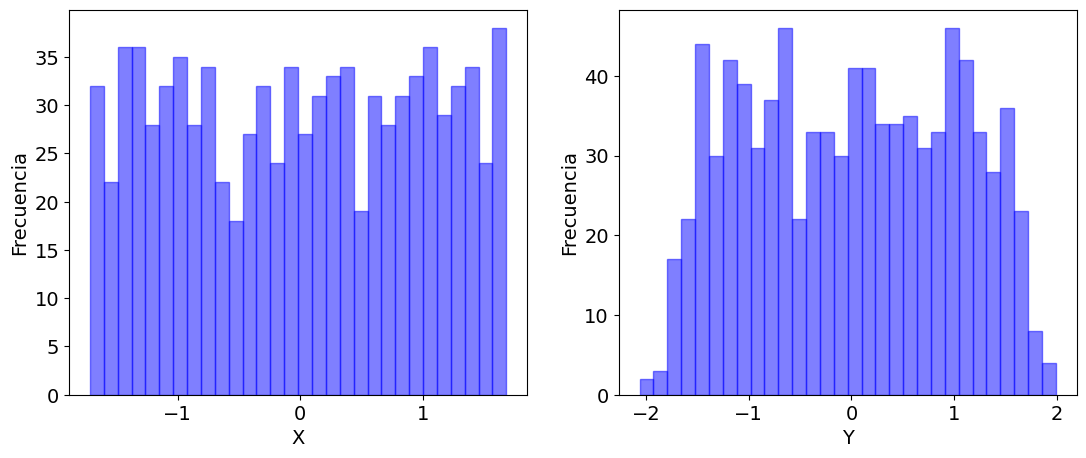

In [31]:
plt.figure(figsize=(13,5))
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)


plt.subplot(1, 2, 1)
plt.hist(train_x, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('X', fontsize=14)
plt.ylabel('Frecuencia',fontsize=14)


plt.subplot(1, 2, 2)
plt.hist(train_y, bins=30,color='blue', edgecolor='b', alpha=0.5)
plt.xlabel('Y',fontsize=14)
plt.ylabel('Frecuencia',fontsize=14);

<font size=4>
   
Las muestras seleccionadas para hacer el entrenamiento se dividen en dos grupos:

El 90 % (este valor es solo un ejemplo) de ellas se emplea para hacer el entrenamiento,
    
mientras que el 10 % restante se emplean para evaluar la evolución del mismo en cada época (iteración).


<img src="./images/train_data.png" width=550 height=550 align = "center" >

<font size=4, color='black'>

Generamos el sistema de aprendizaje que contiene la arquitectura $F(X,W,b)$, así como la métrica que emplearemos para el entrenamiento. 
    
Ejecutaremos el entrenamiento y generaremos las graficas de la función de pérdida (error) como función de la época. En el futuro, estas acciones se programan por separado.    

<font size=4, color='blue'>
Sea $F(\textbf{X},\textbf{W},b)$, la función que describe el sistema de aprendizaje. En donde $\textbf{W}$ y $b$, son los parámetros que la definen.

<img src="./images/AI-correlation-function.png" width=200 height=200 align = "center" >

<font size = 4>

Durante el entrenamiento los valores de $W$ y $b$ son actualizados. Esto se realiza definiendo una métrica para obtener la función de pérdida, la cual compara los valores de la función $F(x_i,\textbf{W},b)$ con los valores $y_i$ para cada una de las muestras.

La siguiente es un ejemplo de este tipo de métricas:
    
$$ (F(x_i,\textbf{w},b)-y_i)^{2}$$

Esto se hace para cada una de las muestras para obtener, en el presente caso, la función de pérdida (loss en Inglés). A esta función también se le conoce con el nombre de función de costo. 

Si m es el número de muestras, la función de pérdida queda como:

$$J(W, b) = \dfrac{1}{m}∑_{i=1}^{m}(F(x_i,\textbf{W},b)-y_i)^{2} $$

    
    
Cuando con los valores de $\bf W$ y $b$, generamos la pérdida (loss) y los actualizamos con la las derivadas de esta, decimos que se ejecutó una época.    

<font size=4 color='black'>
    
Los parámetros $\bf W$ y $b$ se pueden actualizar usando el método de gradiente descendente:
    
[Cauchy, Gradiente Descendente](./Literatura/Cauchy_gradient-descent.pdf)

$$ \textbf {W}_{new} = \textbf{W}_{initial} - \alpha \dfrac{\partial J(W, b)}{\partial \textbf{W}}$$

$$ b_{new} = b_{initial} - \alpha \dfrac{\partial J(W, b)}{\partial b}$$

$\alpha$, ahora se le llama relación de aprendizaje, y es un hiperparámetro del modelo del modelo de aprendizaje. $\alpha$ controla la rapidez con que se varían los valores de los parametros $\bf W$ y $b$. 

<img src="./images/AI-W-b-update.png" width=550 height=550 align = "center" >

<font size=5, color='blue'>
<center>El entrenamiento se realiza sólo con los datos destinados para ello 

<font size=4, color='blue'>
Es muy importante evaluar el entrenamiento en cada época. 

<font size=4, color='black'>
    
Esto se realiza separando una porción (10 %) de los datos destinados inicialmente para el entrenamiento. Con ellos se obtiene un valor de la funcion de pérdida en cada época, llamado pérdida en la validacion, el cual se grafica junto con el valor de la función de pérdida asociada al entrenamiento. 
    
El 90 % del resto de los datos destinados inicialmente para el entrenamiento se emplean para realizar el entrenamiento.


In [32]:
#Function to update weight and bias

def training(x_train, y_train, weight, bias, alpha, epochs, val_ratio=0.1):
    
    # inicializacion de parametros

    alpha = alfa
    d_w = 0.0
    d_b = 0.0

    # Especificaciones de las graficas
    plt.figure(figsize=(13,8)) 
    plt.title('Pérdida vs Epoca', size=24)
    plt.xlabel('Época', size=20)
    plt.ylabel('Pérdida', size=20)
    
    train_ratio = int((1.0-val_ratio)*len(x_train))  
   
    samples_train = (x_train[0:train_ratio], y_train[0:train_ratio])
    samples_val = (x_train[train_ratio:], y_train[train_ratio:])
    x = samples_train[0]
    y = samples_train[1]
    x_val = samples_val[0]
    y_val = samples_val[1]
       
    weights = []
    biases = []
    costs = []
    costs_val = []
    
    m_train = len(x)
    m_val = len(x_val)
    
    for i in range(epochs):

        # calculo de derivadas y el residuo
        cost = 0.0
        cost_val = 0.0
        
        for j in range(m_train):

            r = (y[j]-weight*x[j] - bias)**2

            d_w += 2*(weight*x[j] + bias- y[j])*x[j]
            
            d_b += 2*(weight*x[j]+bias-y[j])

            cost += r

        cost /= m_train

        d_w /= m_train

        d_b /= m_train
        
        #calculo del residuo de las muestras de valoración
        
        for j in range(m_val):

            cost_val += (y_val[j] - weight*x_val[j] - bias)**2

        cost_val /= m_val
               
       
        weights.append(weight)
        biases.append(bias)
        costs.append(cost)
        costs_val.append(cost_val)
        
        # Actualizacion de los parametros

        weight = weight - alpha*d_w
        bias = bias - alpha*d_b
        
        plt.scatter(i, cost, color='green')
        
        plt.scatter(i, cost_val, color='orange')
        plt.legend(['Training', 'Validation'], loc='upper right')

    return weights, biases, costs, costs_val

<img src="./images/Training.png" width=550 height=550 align = "center" >

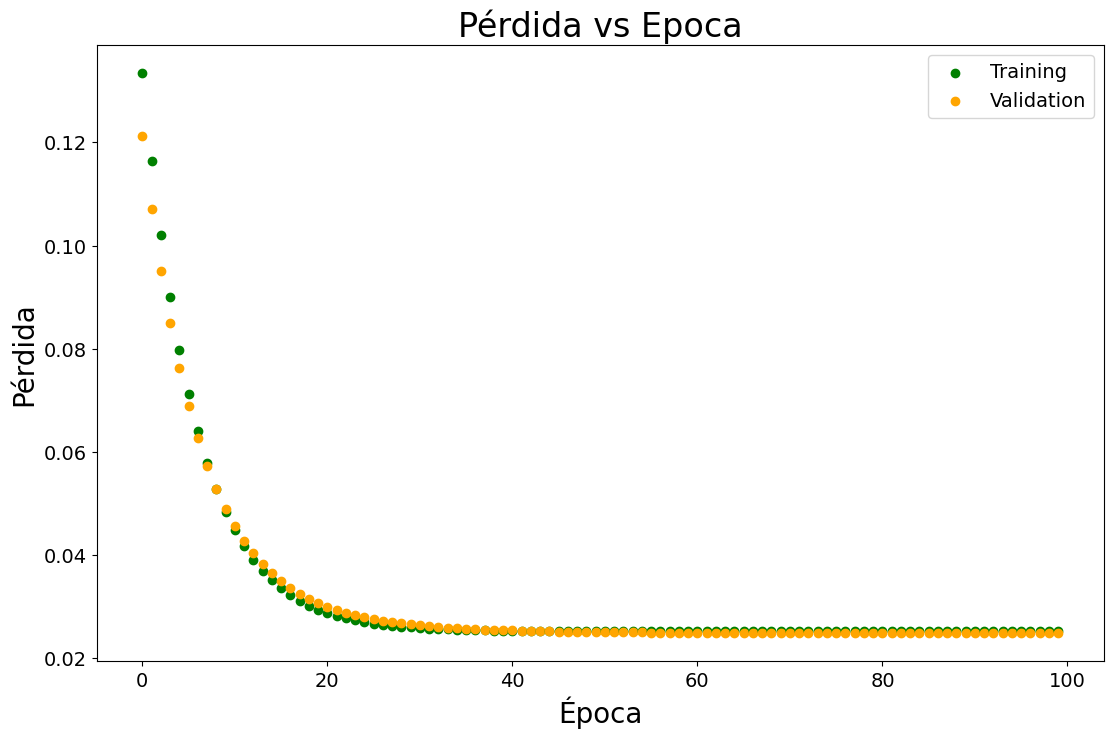

In [33]:
weight_0 = np.random.random()
bias_0 = np.random.random()
alpha = 0.04
num_epochs = 100
validation_ratio = 0.1

weights, biases, cost, cost_val = training \
        (train_x, train_y, weight_0, bias_0, alpha, num_epochs, validation_ratio)


<font size=5, color='blue'>

Inferencia (predicción)

<img src="./images/Predictions.png" width=350 height=350 align = "center" >

<font size=4, color='black'>

Dado el tiempo $X$ el sistema de aprendizaje puede predecir (inferir) del valor de la distancia ($Y$) para ese tiempo.

<font size=4 color='blue'>
    
Recuerdese que para realizar el entrenamiento del sistema de aprendizaje, tanto la variable dependiente, $Y$, como la variable independiente, $X$, fueron normalizadas.
    


In [34]:
def loss(x, y, weight, bias):
    
    r = 0

    m = len(x)
    
    for i in range(m):

        r += (y[i]-weight*x[i] - bias)**2

    r /= m
    
    return r

In [35]:
test_y = (y_test-y_mean)/y_std

test_x = (x_test-x_mean)/x_std

print("loss_prueba =  %.5f" %loss(test_x, test_y, weights[-1], biases[-1]))

loss_prueba =  0.02938


<font size=4>

Para poder explotar lo aprendido por el sistema de aprendizaje con un conjunto de muestras nuevas, es necesario reescalar el valor de la variable independiente, $X$, de cada muestra nueva. 
    
Una vez inferido, para una muestra, el valor de la variable dependiente, $Y$, es necesario reescalarlo para tener un valor que se pueda comparar con lo valores originales en las muestras empleadas para el entrenamiento.

In [36]:
def inference(x, w, b, x_train_mean, x_train_std, y_train_mean, y_train_std) :
    
    # reescalando la variable x
    x = (x - x_train_mean) / x_train_std
    
    y = w * x + b
    
    # reescalando el valor inferido
    y = y * y_train_std + y_train_mean
    
    return y

In [37]:
tiempos = [1.65, 32.20, 43.5, 84.7]

for t in tiempos :
    distancia = inference(x=t,w=weights[-1], b=biases[-1], \
                          x_train_mean = x_mean, x_train_std = x_std,\
                          y_train_mean = y_mean, y_train_std = y_std)

    print ("Para el tiempo de {0:5.2f} s la distancia inferida es {1:6.2f} cm ".\
           format(t,distancia))

Para el tiempo de  1.65 s la distancia inferida es 124.80 cm 
Para el tiempo de 32.20 s la distancia inferida es 738.60 cm 
Para el tiempo de 43.50 s la distancia inferida es 965.64 cm 
Para el tiempo de 84.70 s la distancia inferida es 1793.42 cm 


<font size=5, color='blue'>
<center> Resumen de la solución de nuestro problema empleando Inteligencia Artificial

<img src="./images/AI-complete-system.png" width=450 height=450 align = "left" >


<img src="./images/Predictions.png" width=300 height=300 align="center" >
